In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()

In [2]:
data=pd.read_csv('QVI_data.csv')
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
data.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [4]:
data.dtypes

LYLTY_CARD_NBR        int64
DATE                 object
STORE_NBR             int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
PACK_SIZE             int64
BRAND                object
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

In [5]:
data['DATE']=pd.to_datetime(data['DATE'],format='%Y-%m-%d')
data.dtypes

LYLTY_CARD_NBR               int64
DATE                datetime64[ns]
STORE_NBR                    int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
PACK_SIZE                    int64
BRAND                       object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [6]:
data['year']=data['DATE'].dt.year
data['month']=data['DATE'].dt.month
data['day']=data['DATE'].dt.day
data['weekday']=data['DATE'].dt.day_name()
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,year,month,day,weekday
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018,10,17,Wednesday
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018,9,16,Sunday
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019,3,7,Thursday
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019,3,8,Friday
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018,11,2,Friday


In [7]:
data.groupby(['year','month'])['DATE'].count()

year  month
2018  7        22562
      8        22410
      9        21743
      10       22288
      11       21852
      12       22835
2019  1        22161
      2        20405
      3        22592
      4        21766
      5        22391
      6        21829
Name: DATE, dtype: int64

### We have data of transactions from different stores from July 2018 to June 2019
### As told in the problem statement, we will consider only those stores that have atleast one transaction in every month from July-2018 to June-2019.

In [8]:
data.shape

(264834, 16)

In [9]:
storecheck=data.groupby(['STORE_NBR','month'])['DATE'].count().unstack()
df=storecheck.reset_index()
df.isnull().sum()

month
STORE_NBR    0
1            9
2            8
3            7
4            7
5            9
6            8
7            6
8            9
9            8
10           7
11           8
12           9
dtype: int64

In [10]:
cleaned=df.dropna(how='any').reset_index()
cleaned.drop('index',axis=1,inplace=True)
cleaned

month,STORE_NBR,1,2,3,4,5,6,7,8,9,10,11,12
0,1,36.0,55.0,49.0,43.0,51.0,43.0,52.0,43.0,62.0,45.0,47.0,47.0
1,2,45.0,32.0,46.0,49.0,50.0,42.0,41.0,43.0,37.0,43.0,40.0,38.0
2,3,121.0,139.0,130.0,110.0,123.0,122.0,138.0,134.0,119.0,119.0,118.0,129.0
3,4,168.0,102.0,135.0,137.0,126.0,134.0,160.0,151.0,138.0,155.0,139.0,133.0
4,5,118.0,106.0,97.0,109.0,104.0,127.0,120.0,112.0,125.0,107.0,111.0,125.0
5,6,37.0,40.0,40.0,38.0,53.0,40.0,51.0,47.0,38.0,54.0,51.0,41.0
6,7,115.0,121.0,139.0,109.0,123.0,129.0,120.0,131.0,128.0,124.0,129.0,114.0
7,8,50.0,38.0,52.0,41.0,47.0,38.0,43.0,46.0,36.0,49.0,40.0,40.0
8,9,66.0,45.0,54.0,46.0,55.0,45.0,50.0,56.0,59.0,57.0,65.0,61.0
9,10,126.0,121.0,120.0,106.0,112.0,105.0,122.0,125.0,139.0,127.0,128.0,136.0


In [11]:
cleaned.isnull().sum()

month
STORE_NBR    0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
dtype: int64

In [12]:
lst=list(range(1,273))
dropstore=[i for i in lst if i not in list(cleaned.STORE_NBR.unique())]
dropstore

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [13]:
for i in dropstore:
    data=data.loc[data.STORE_NBR!=i,:]
data.shape

(264645, 16)

In [14]:
data=data.reset_index()
data=data.drop('index',axis=1)

In [15]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,year,month,day,weekday
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018,10,17,Wednesday
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018,9,16,Sunday
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019,3,7,Thursday
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019,3,8,Friday
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018,11,2,Friday


# Now the 'data' DataFrame is having only those transactions that happens at stores which have transactions for every month from July 2018 to June 2019.

## To find Control Store we define metrics :-
### Monthly Revenue
### Monthly number of transactions
### Transactions per customer

# Function to find Control stores for Trial stores in terms of Monthly Sales revenue.

In [16]:
monthly_sales=data.groupby(['month','STORE_NBR']).sum()['TOT_SALES'].unstack()
monthlySales_tillJan=monthly_sales.drop([2,3,4,5,6],axis=0)
temp=monthlySales_tillJan.iloc[0,:]
monthlySales_tillJan=monthlySales_tillJan.iloc[1:,:]
monthlySales_tillJan=monthlySales_tillJan.append(temp)
monthly_sales=monthly_sales.drop([1,2,3,4,5,6],axis=0).append(monthly_sales.iloc[:6,:])
monthlySales_tillJan

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
month,,,,,,,,,,,,,,,,,,,,,
7,206.9,150.8,1205.70,1399.9,812.0,260.0,1024.7,381.6,289.7,892.00,...,38.7,232.6,247.8,127.3,6.2,224.00,982.0,962.80,956.6,433.10
8,176.1,193.8,1079.75,1259.5,745.1,203.2,1119.9,383.0,327.5,878.65,...,28.0,203.3,227.1,154.5,24.9,322.65,835.1,1003.75,683.9,372.85
9,278.8,154.4,1021.50,1198.6,896.0,207.7,1147.3,293.0,369.7,945.00,...,21.8,199.5,133.5,139.0,23.3,174.40,886.0,845.40,798.4,304.70
10,188.1,167.8,1037.90,1346.4,798.0,292.4,1063.9,422.8,361.0,910.80,...,36.6,170.0,162.9,170.4,14.4,237.60,1078.4,816.40,790.0,430.60
11,192.6,162.9,1008.00,1212.0,771.4,255.3,1076.5,349.2,374.4,885.00,...,15.8,184.5,282.8,144.2,40.3,225.40,967.2,965.00,886.4,376.20
12,189.6,136.0,1121.60,1185.6,879.2,209.1,906.1,356.4,382.6,936.60,...,24.6,288.5,205.3,157.8,15.4,207.30,935.4,1038.00,807.4,403.90
1,154.8,162.8,1051.70,1525.0,838.0,191.1,975.1,445.0,399.4,878.60,...,21.3,247.3,176.7,148.7,34.4,157.70,980.4,1066.60,842.4,423.00


In [17]:
def Sales_control(strnbr):
    monthly_sales_func=data.groupby(['month','STORE_NBR']).sum()['TOT_SALES'].unstack()
    monthlySales_tillJan_func=monthly_sales_func.drop([2,3,4,5,6],axis=0)
    temp_func=monthlySales_tillJan_func.iloc[0,:]
    monthlySales_tillJan_func=monthlySales_tillJan_func.iloc[1:,:]
    monthlySales_tillJan_func=monthlySales_tillJan_func.append(temp_func)
    except_strnbr=monthlySales_tillJan_func.drop([strnbr],axis=1)
    
    mean_func=monthlySales_tillJan_func[strnbr].mean()
    std_func=monthlySales_tillJan_func[strnbr].std()
    control_sales_func=pd.DataFrame((abs(except_strnbr.mean()-mean_func)*0.6)+0.4*abs(except_strnbr.std()-std_func))
    control_sales_func.columns=['mag']
    control_sales_func['direction_corr']=monthlySales_tillJan_func.corr().loc[strnbr].drop(strnbr,axis=0)
    control_sales_func['mag']=1/control_sales_func['mag']
    
    control_sales_func['mag']=normalize.fit_transform(np.array(control_sales_func['mag']).reshape((259,1)))
    control_sales_func['tot_corr']=1*control_sales_func['direction_corr'] + 1*control_sales_func['mag']
    control_sales_func['rank']=control_sales_func.rank(method='first',ascending=False)['tot_corr']
    return control_sales_func 

# Function to find Control stores for Trial stores in terms of Monthly number of transactions.

In [18]:
trans=data.groupby(['month','STORE_NBR']).count()['TOT_SALES'].unstack()
monthlyTrans_tillJan=trans.drop([2,3,4,5,6],axis=0)
temp=monthlyTrans_tillJan.iloc[0,:]
monthlyTrans_tillJan=monthlyTrans_tillJan.iloc[1:,:]
monthlyTrans_tillJan=monthlyTrans_tillJan.append(temp)
trans=trans.drop([1,2,3,4,5,6],axis=0).append(trans.iloc[:6,:])
monthlyTrans_tillJan

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
month,,,,,,,,,,,,,,,,,,,,,
7,52,41,138,160,120,51,120,43,50,122,...,9,53,54,33,2,52,139,139,129,52
8,43,43,134,151,112,47,131,46,56,125,...,6,41,56,40,5,54,132,154,101,48
9,62,37,119,138,125,38,128,36,59,139,...,4,46,33,40,5,34,124,126,114,36
10,45,43,119,155,107,54,124,49,57,127,...,8,39,38,42,4,48,148,119,114,51
11,47,40,118,139,111,51,129,40,65,128,...,2,38,63,39,9,51,136,133,122,45
12,47,38,129,133,125,41,114,40,61,136,...,6,60,47,46,5,43,133,149,117,47
1,36,45,121,168,118,37,115,50,66,126,...,5,50,34,46,9,38,144,155,120,50


In [19]:
def Transactions_control(strnbr):
    monthly_sales_func=data.groupby(['month','STORE_NBR']).count()['TOT_SALES'].unstack()
    monthlySales_tillJan_func=monthly_sales_func.drop([2,3,4,5,6],axis=0)
    temp_func=monthlySales_tillJan_func.iloc[0,:]
    monthlySales_tillJan_func=monthlySales_tillJan_func.iloc[1:,:]
    monthlySales_tillJan_func=monthlySales_tillJan_func.append(temp_func)
    except_strnbr=monthlySales_tillJan_func.drop([strnbr],axis=1)
    
    mean_func=monthlySales_tillJan_func[strnbr].mean()
    std_func=monthlySales_tillJan_func[strnbr].std()
    control_sales_func=pd.DataFrame((abs(except_strnbr.mean()-mean_func)*0.6)+0.4*abs(except_strnbr.std()-std_func))
    control_sales_func.columns=['mag']
    control_sales_func['direction_corr']=monthlySales_tillJan_func.corr().loc[strnbr].drop(strnbr,axis=0)
    control_sales_func['mag']=1/control_sales_func['mag']
    
    control_sales_func['mag']=normalize.fit_transform(np.array(control_sales_func['mag']).reshape((259,1)))
    control_sales_func['tot_corr'] = 1*control_sales_func['direction_corr'] + 1*control_sales_func['mag']
    control_sales_func['rank']=control_sales_func.rank(method='first',ascending=False)['tot_corr']
    return control_sales_func 

# Function to find control stores for Trial stores in terms of Monthly number of transactions per customer.

In [20]:
def transPerCustomer_control(strnbr):
    unique_customers=data.groupby(['month','STORE_NBR','LYLTY_CARD_NBR']).sum()['day'].unstack()
    month={'month':[7,8,9,10,11,12,1]}
    store_nbr={'STORE_NBR':list(data.STORE_NBR.unique())}
    noOfCustomers=pd.DataFrame(index=month['month'],columns=store_nbr['STORE_NBR'])
    for i in [7,8,9,10,11,12,1]:
        lst=[]
        for j in data.STORE_NBR.unique():
             lst.append(unique_customers.loc[i,j].notnull().sum())
        noOfCustomers.loc[i]=pd.Series(lst,index=list(data.STORE_NBR.unique()))
    monthly_sales_func=data.groupby(['month','STORE_NBR']).count()['TOT_SALES'].unstack()
    monthlySales_tillJan_func=monthly_sales_func.drop([2,3,4,5,6],axis=0)
    temp_func=monthlySales_tillJan_func.iloc[0,:]
    monthlySales_tillJan_func=monthlySales_tillJan_func.iloc[1:,:]
    monthlySales_tillJan_func=monthlySales_tillJan_func.append(temp_func)
    transPerCustomer=monthlySales_tillJan_func/noOfCustomers
    transPerCustomer.columns.name='STORE_NBR'
    transPerCustomer=transPerCustomer.astype(float)
    
    except_strnbr= transPerCustomer.drop([strnbr],axis=1)
    
    mean_func= transPerCustomer[strnbr].mean()
    std_func= transPerCustomer[strnbr].std()
    control_sales_func=pd.DataFrame((abs(except_strnbr.mean()-mean_func)*0.6)+0.4*abs(except_strnbr.std()-std_func))
    control_sales_func.columns=['mag']
    tpc=transPerCustomer.corr().fillna(0)
    control_sales_func['tot_corr']=tpc.loc[strnbr].drop(strnbr,axis=0)
    control_sales_func.drop('mag',axis=1,inplace=True)
    control_sales_func['rank']=control_sales_func.rank(method='first',ascending=False)['tot_corr']
    return control_sales_func 

## In order to find Control stores for Trial stores we would consider " Monthly Revenue" and "Monthly number of transactions" more important than "Monthly number of transactions per customer" , because "Monthly number of transactions per customer" only tells us how many times a customer buys chips from supermarket in a month. It does'nt matter much if a customer buys chips only once in a month , what matters more is that how many transactions occur in that supermarket monthly, and what amount of revenue does a supermarket generates in a month. 

### Finding Control Store for Trial store number - 77

In [21]:
a=Sales_control(77)['tot_corr']
b=Transactions_control(77)['tot_corr']
c=transPerCustomer_control(77)['tot_corr']*0.5
control_store_77=pd.DataFrame(a+b+c)
control_store_77['rank']=control_store_77.rank(method='first',ascending=False)['tot_corr']
control_store_77.sort_values('rank')

,tot_corr,rank
STORE_NBR,,
233,2.288176,1.0
17,2.168280,2.0
119,2.140140,3.0
46,2.008891,4.0
71,1.896263,5.0
115,1.840418,6.0
3,1.831962,7.0
41,1.812185,8.0
162,1.720911,9.0


### Store number 233 is best correlated with store 77 .

## Graphically verifying correlation between Control store-233 and Trial store-77 

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


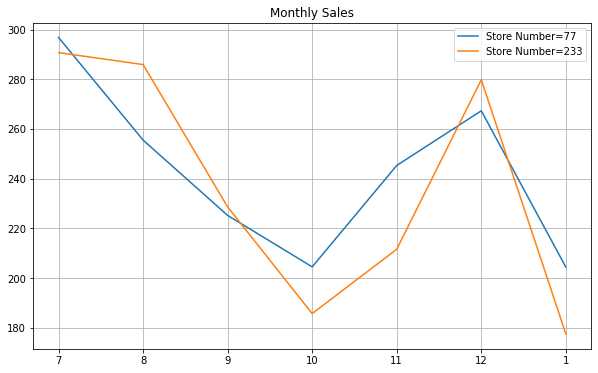

In [22]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.plot(['7','8','9','10','11','12','1'],monthlySales_tillJan[77],label='Store Number=77')
ax.plot(['7','8','9','10','11','12','1'],monthlySales_tillJan[233],label='Store Number=233')
ax.legend()
ax.set_title('Monthly Sales')
plt.grid()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


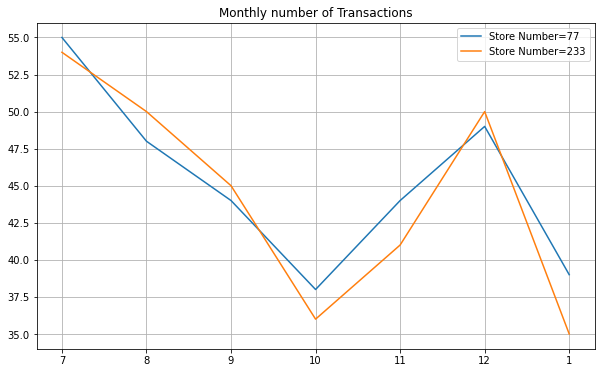

In [23]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.plot(['7','8','9','10','11','12','1'],monthlyTrans_tillJan[77],label='Store Number=77')
ax.plot(['7','8','9','10','11','12','1'],monthlyTrans_tillJan[233],label='Store Number=233')
ax.legend()
ax.set_title('Monthly number of Transactions')
plt.grid()

### Finding Control Store for Trial store number - 86

In [24]:
p=Sales_control(86)['tot_corr']
q=Transactions_control(86)['tot_corr']
r=transPerCustomer_control(86)['tot_corr']*0.5
control_store_86=pd.DataFrame(p+q+r)
control_store_86['rank']=control_store_86.rank(method='first',ascending=False)['tot_corr']
control_store_86.sort_values('rank')

,tot_corr,rank
STORE_NBR,,
138,2.016999,1.0
22,1.938990,2.0
155,1.700645,3.0
166,1.671638,4.0
240,1.644786,5.0
269,1.597671,6.0
176,1.566613,7.0
75,1.541853,8.0
49,1.520999,9.0


### Store number 138 is best correlated with store 86.

## Graphically verifying correlation between Control store-138 and Trial store-86

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


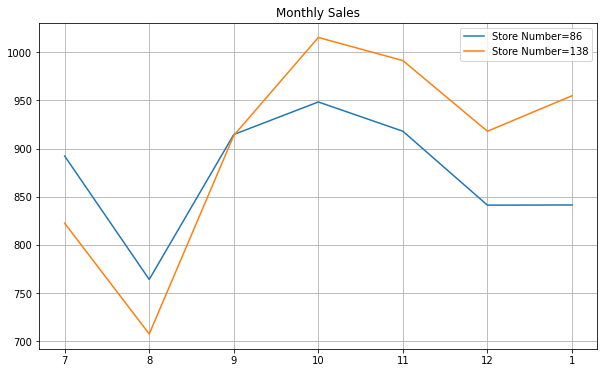

In [25]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.plot(['7','8','9','10','11','12','1'],monthlySales_tillJan[86],label='Store Number=86')
ax.plot(['7','8','9','10','11','12','1'],monthlySales_tillJan[138],label='Store Number=138')
ax.legend()
ax.set_title('Monthly Sales')
plt.grid()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


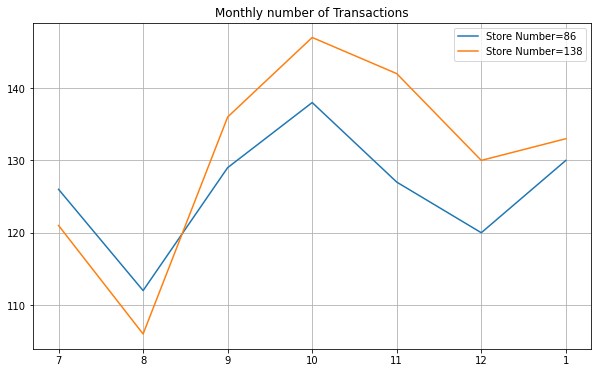

In [26]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.plot(['7','8','9','10','11','12','1'],monthlyTrans_tillJan[86],label='Store Number=86')
ax.plot(['7','8','9','10','11','12','1'],monthlyTrans_tillJan[138],label='Store Number=138')
ax.legend()
ax.set_title('Monthly number of Transactions')
plt.grid()

### Finding Control Store for Trial store number - 88

In [27]:
p=Sales_control(88)['tot_corr']
q=Transactions_control(88)['tot_corr']
r=transPerCustomer_control(88)['tot_corr']*0.5
control_store_88=pd.DataFrame(p+q+r)
control_store_88['rank']=control_store_88.rank(method='first',ascending=False)['tot_corr']
control_store_88.sort_values('rank')

,tot_corr,rank
STORE_NBR,,
237,2.874622,1.0
178,1.910866,2.0
203,1.855089,3.0
134,1.841967,4.0
91,1.721976,5.0
204,1.659508,6.0
201,1.595769,7.0
123,1.589065,8.0
106,1.513025,9.0


### Store number 237 is best correlated with store 88.

## Graphically verifying correlation between Control store-237 and Trial store-88

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


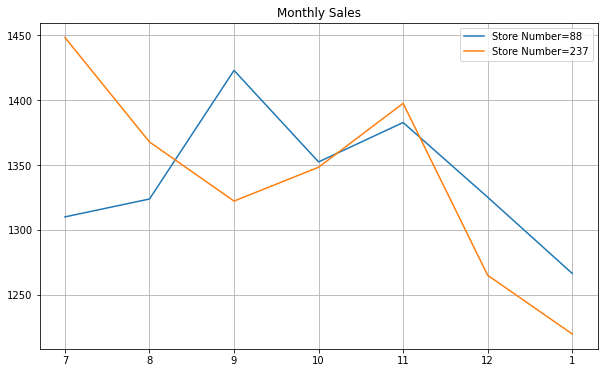

In [28]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.plot(['7','8','9','10','11','12','1'],monthlySales_tillJan[88],label='Store Number=88')
ax.plot(['7','8','9','10','11','12','1'],monthlySales_tillJan[237],label='Store Number=237')
ax.legend()
ax.set_title('Monthly Sales')
plt.grid()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


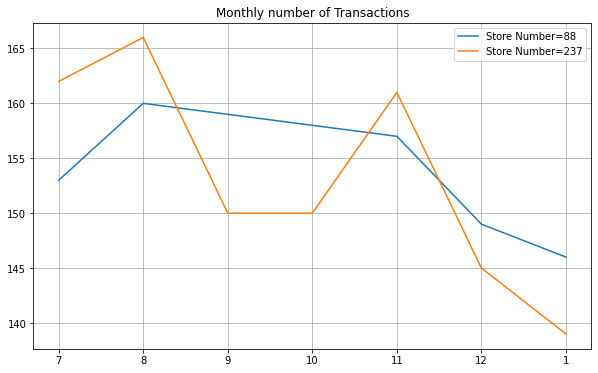

In [29]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.plot(['7','8','9','10','11','12','1'],monthlyTrans_tillJan[88],label='Store Number=88')
ax.plot(['7','8','9','10','11','12','1'],monthlyTrans_tillJan[237],label='Store Number=237')
ax.legend()
ax.set_title('Monthly number of Transactions')
plt.grid()

# We have found out the Control stores for Trial stores based on data of pre-trial period :-
### 77-233
### 86-138
### 88-237

# Finding whether the change in layout of Trial stores turned out to be profitable or not.

In [30]:
monthly_sales

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
month,,,,,,,,,,,,,,,,,,,,,
7,206.9,150.8,1205.70,1399.90,812.0,260.0,1024.7,381.6,289.7,892.00,...,38.7,232.6,247.8,127.3,6.2,224.00,982.0,962.80,956.6,433.10
8,176.1,193.8,1079.75,1259.50,745.1,203.2,1119.9,383.0,327.5,878.65,...,28.0,203.3,227.1,154.5,24.9,322.65,835.1,1003.75,683.9,372.85
9,278.8,154.4,1021.50,1198.60,896.0,207.7,1147.3,293.0,369.7,945.00,...,21.8,199.5,133.5,139.0,23.3,174.40,886.0,845.40,798.4,304.70
10,188.1,167.8,1037.90,1346.40,798.0,292.4,1063.9,422.8,361.0,910.80,...,36.6,170.0,162.9,170.4,14.4,237.60,1078.4,816.40,790.0,430.60
11,192.6,162.9,1008.00,1212.00,771.4,255.3,1076.5,349.2,374.4,885.00,...,15.8,184.5,282.8,144.2,40.3,225.40,967.2,965.00,886.4,376.20
12,189.6,136.0,1121.60,1185.60,879.2,209.1,906.1,356.4,382.6,936.60,...,24.6,288.5,205.3,157.8,15.4,207.30,935.4,1038.00,807.4,403.90
1,154.8,162.8,1051.70,1525.00,838.0,191.1,975.1,445.0,399.4,878.60,...,21.3,247.3,176.7,148.7,34.4,157.70,980.4,1066.60,842.4,423.00
2,225.4,139.4,1197.70,883.40,727.0,224.0,1026.4,345.4,259.4,853.00,...,37.4,175.2,212.7,119.7,23.0,165.00,955.2,868.40,746.2,395.50
3,192.9,192.1,1124.40,1192.40,681.4,179.5,1145.8,441.4,367.6,862.00,...,26.0,161.0,164.1,128.2,23.6,225.00,845.8,991.20,735.8,442.30


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


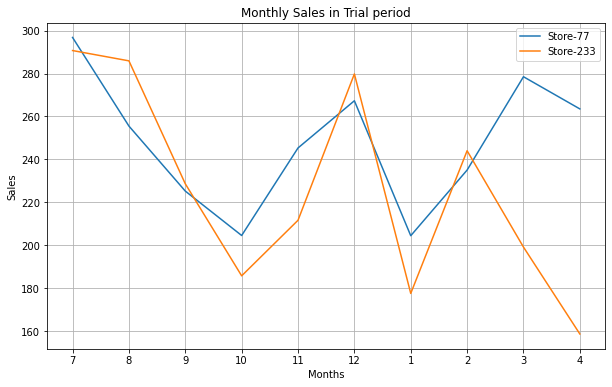

In [31]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.plot(['7','8','9','10','11','12','1','2','3','4'],monthly_sales.iloc[:10,:][77],label='Store-77')
ax.plot(['7','8','9','10','11','12','1','2','3','4'],monthly_sales.iloc[:10,:][233],label='Store-233')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Sales in Trial period')
plt.grid()

## We can see that in trial period, Sales of Store 77 incresed in comparision to Control store-233, especially in 3rd and 4th month.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


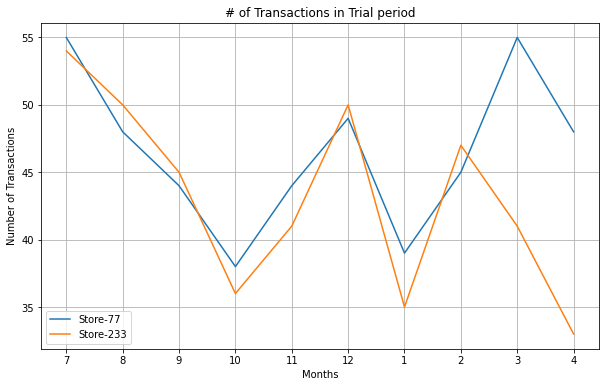

In [32]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.plot(['7','8','9','10','11','12','1','2','3','4'],trans.iloc[:10,:][77],label='Store-77')
ax.plot(['7','8','9','10','11','12','1','2','3','4'],trans.iloc[:10,:][233],label='Store-233')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Number of Transactions')
plt.title('# of Transactions in Trial period')
plt.grid()

## Similar as Sales, Number of Transactions in Trial store-77 also increased in 3rd and 4th month, as compared to Control store-233.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


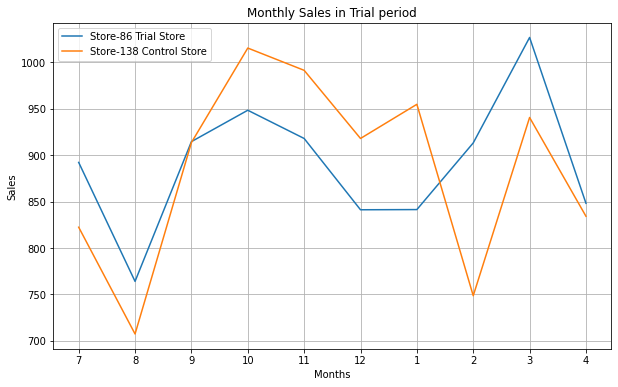

In [33]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.plot(['7','8','9','10','11','12','1','2','3','4'],monthly_sales.iloc[:10,:][86],label='Store-86 Trial Store')
ax.plot(['7','8','9','10','11','12','1','2','3','4'],monthly_sales.iloc[:10,:][138],label='Store-138 Control Store')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Sales in Trial period')
plt.grid()

## In above figure we can see that there was not a significant increase in sales of Store-86 as compared to Control store-138 in trial months.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


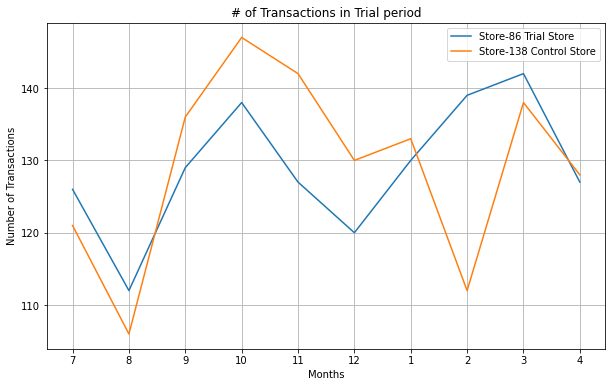

In [34]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.plot(['7','8','9','10','11','12','1','2','3','4'],trans.iloc[:10,:][86],label='Store-86 Trial Store')
ax.plot(['7','8','9','10','11','12','1','2','3','4'],trans.iloc[:10,:][138],label='Store-138 Control Store')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Number of Transactions')
plt.title('# of Transactions in Trial period')
plt.grid()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


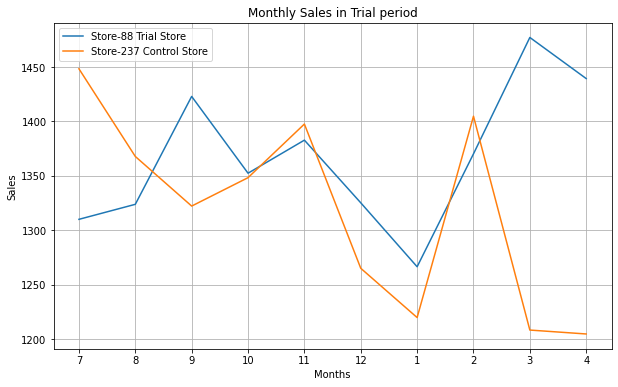

In [35]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.plot(['7','8','9','10','11','12','1','2','3','4'],monthly_sales.iloc[:10,:][88],label='Store-88 Trial Store')
ax.plot(['7','8','9','10','11','12','1','2','3','4'],monthly_sales.iloc[:10,:][237],label='Store-237 Control Store')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Sales in Trial period')
plt.grid()

## We can see that in trial period Sales of Store 88 incresed in comparision to Control store-237, especially in 3rd and 4th month.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


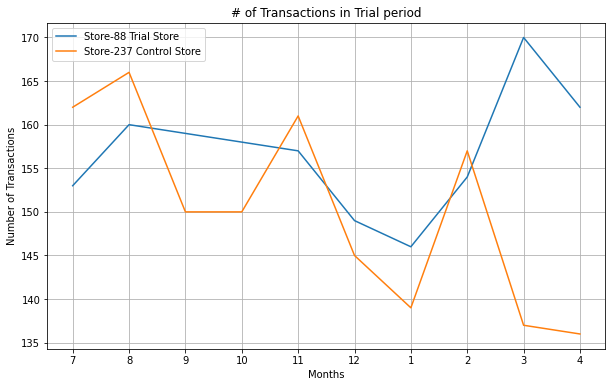

In [36]:
plt.figure(figsize=(10,6))
ax=plt.subplot()
ax.plot(['7','8','9','10','11','12','1','2','3','4'],trans.iloc[:10,:][88],label='Store-88 Trial Store')
ax.plot(['7','8','9','10','11','12','1','2','3','4'],trans.iloc[:10,:][237],label='Store-237 Control Store')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Number of Transactions')
plt.title('# of Transactions in Trial period')
plt.grid()

## Similar as Sales, Number of Transactions in Trial store-88 also increased in 3rd and 4th month, as compared to Control store-237.